Shape of X and y respectively (train): (820, 13) (820,)
Shape of X and y respectively (test): (205, 13) (205,)
RandomForestClassifier
Training Score: 0.9329268292682927
Testing Score: 0.9414634146341463
   Predicted
0          1
1          1
2          0
3          1
4          0
Accuracy: 0.9414634146341463
              precision    recall  f1-score   support

           0       0.98      0.90      0.94        98
           1       0.91      0.98      0.95       107

    accuracy                           0.94       205
   macro avg       0.95      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205

Logistic Regression
Training Score: 0.8621951219512195
Testing Score: 0.8634146341463415
   Predicted
0          1
1          1
2          0
3          1
4          0
% of people predicted with heart-disease: 0.5902439024390244
              precision    recall  f1-score   support

           0       0.92      0.79      0.85        98
           1       0.83   

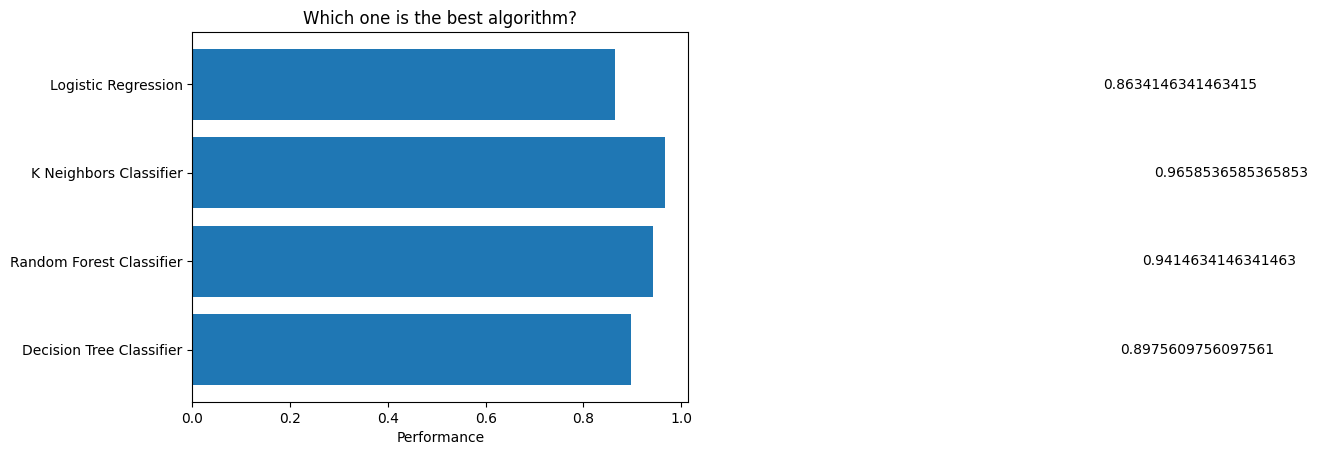

In [10]:
#importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

# Importing dataset
df = pd.read_csv('heart.csv')
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Shape of X and y respectively (train):', X_train.shape, y_train.shape)
print('Shape of X and y respectively (test):', X_test.shape, y_test.shape)

# RandomForestClassifier
print('RandomForestClassifier')
model = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
train_score = model.score(X_train, y_train)
print('Training Score:', train_score)
test_score = model.score(X_test, y_test)
score_rfc = test_score
print('Testing Score:', test_score)
output = pd.DataFrame({'Predicted': y_pred})
print(output.head())
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

#logistic regression
print('Logistic Regression')
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
Y_pred = model.predict(X_test)
score = model.score(X_train, y_train)
print('Training Score:', score)
score = model.score(X_test, y_test)
score_logreg = score
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred})
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_logreg = score
out_logreg = output
print(classification_report(y_test,Y_pred))

#descision tree
print('DecisionTreeClassifier')
decision_tree = DecisionTreeClassifier(max_depth=5 , random_state=0)
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
score = decision_tree.score(X_train, y_train)
score_dtc = score
print('Training Score:', score)
score = decision_tree.score(X_test, y_test)
print('Testing Score:', score)
output = pd.DataFrame({'Predicted':Y_pred}) # Heart-Disease yes or no? 1/0
print(output.head())
people = output.loc[output.Predicted == 1]["Predicted"]
rate_people = 0
if len(people) > 0 :
    rate_people = len(people)/len(output)
print("% of people predicted with heart-disease:", rate_people)
score_dtc = score
out_dtc = output
print(classification_report(y_test,Y_pred))

#knn
print('KNeighborsClassifier')
param_grid = {'n_neighbors': [3, 5, 7, 9],
              'metric': ['euclidean', 'manhattan']}
knn = KNeighborsClassifier()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)
best_knn = grid_search.best_estimator_
cv_scores = cross_val_score(best_knn, X_train_scaled, y_train, cv=5)
print('Mean Cross-Validation Score:', cv_scores.mean())
best_knn.fit(X_train_scaled, y_train)
test_score = best_knn.score(X_test_scaled, y_test)
score_knc = test_score
print('Testing Score:', test_score)
y_pred = best_knn.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
print(report)
rate_people = (y_pred == 1).sum() / len(y_pred)
print("% of people predicted with heart disease:", rate_people)


#comparision between all the techniques
plt.rcdefaults()
fig, ax = plt.subplots()
algorithms = ('Logistic Regression', 'K Neighbors Classifier', 'Random Forest Classifier', 'Decision Tree Classifier')
y_pos = np.arange(len(algorithms))
x = (score_logreg, score_knc, score_rfc, score_dtc) # scores
ax.barh(y_pos, x, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(algorithms)
ax.invert_yaxis()
ax.set_xlabel('Performance')
ax.set_title('Which one is the best algorithm?')
for i, v in enumerate(x):
    ax.text(v + 1, i, str(v), color='black', va='center', fontweight='normal')
plt.show()